## Capstone Project in Data Visualization
- Summer Semester 23/24
- Name: Kerem Uysal

## Project Objective

### Analyzing the Evolution of Female Participation and Success in the Olympic Games

The Olympics show us the best in sports from around the world. Historically dominated by male athletes, the dynamics have shifted over the years with increasing female participation and success. This project aims to uncover and visualize the trends in female athletes' participation across various Olympic disciplines over the years, from the first modern Olympics in 1896 through the 2016 games. By doing so, I try to highlight the progress towards gender equality in sports.

This analysis will provide insights into:
- The growth in the number of female athletes over time.
- The evolution of gender parity across different sports.
- The rise in the number of medals won by female athletes in the Olympics.

I hope that by the end of this project, we will see how much better things have gotten for women in the Olympics and think about what this means for women in sports all over the world.


## Load the Packages and the Data

In [74]:
import pandas as pd
import altair as alt
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
import plotly.express as px
from shapely.geometry import Point
import plotly.graph_objs as go
import plotly.subplots as tls

In [75]:
merged_data = pd.read_csv('merged_data.csv')

- **Data**: You can check the companion notebook about the data and all of the preprocessing and the missing data imputation.
  The dataset used in this project is a historical compilation of the modern Olympic Games,  from the first Games in Athens in 1896 to the 2016 Games in Rio de Janeiro. This dataset captures the essence of the Olympic competitions through the years, detailing the events, athletes, results, and medal distributions.

In [76]:
merged_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,175.402195,70.446834,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,182.480000,95.615385,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


## Visualizations and Analysis

### 1-) Olympic Participation by Gender and Season Over Time

The first visualization captures  trend of female participation across Summer and Winter Olympics. Starting from a modest presence in the early 20th century, there has been a significant upward trend in the number of female athletes.

In [77]:

gender_participation.rename(columns={'ID': 'Athlete_Count'}, inplace=True)
gender_participation = merged_data.groupby(['Year', 'Sex', 'Season']).agg({'ID': 'nunique'}).reset_index()

# Rename the columns for clarity
gender_participation.rename(columns={'ID': 'Athlete_Count'}, inplace=True)
# Pivot the data to get years on the index and genders as columns with seasons included
pivot_data = gender_participation.pivot(index=['Year', 'Season'], columns='Sex', values='Athlete_Count')

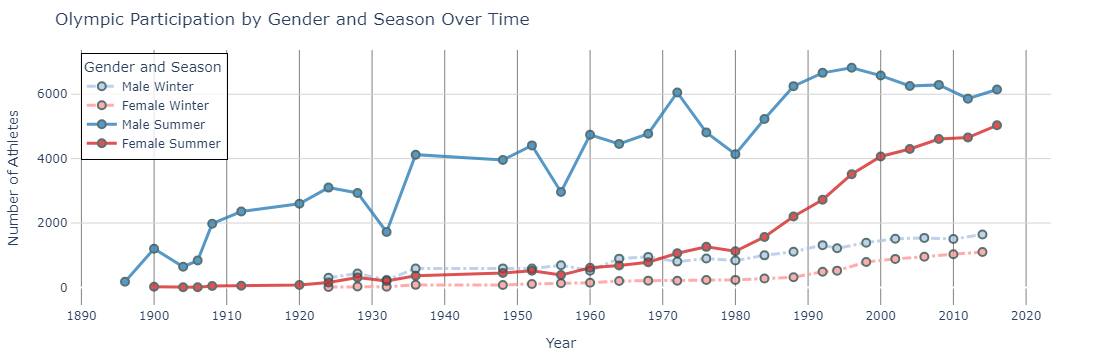

In [78]:
fig = go.Figure()


color_palette = {
    'Male Winter': {'color': '#aec7e8', 'dash': 'dashdot'},  # lighter blue for winter
    'Female Winter': {'color': '#ff9896', 'dash': 'dashdot'},  # Lighter red for winter
    'Male Summer': {'color': '#2c7fb8', 'dash': 'solid'},  # Dark blue for summer
    'Female Summer': {'color': '#d62728', 'dash': 'solid'}  # Brighter red for summer
}
# Adjust line styles and opacity for clarity
for season in ['Winter', 'Summer']:
    season_data = pivot_data.xs(season, level='Season')
    for gender in ['M', 'F']:
        trace_name = f'{"Male" if gender == "M" else "Female"} {season}'
        style = color_palette[trace_name]
        fig.add_trace(go.Scatter(
            x=season_data.index, 
            y=season_data[gender],
            mode='lines+markers',
            name=trace_name,
            line=dict(color=style['color'], width=3, dash=style['dash']),
            marker=dict(color=style['color'], size=8, line=dict(width=2, color='DarkSlateGrey')),
            opacity=0.8  # Adjusting opacity for better visual distinction
        ))

# Update layout: grid lines, legend, and responsive design
fig.update_layout(
    title='Olympic Participation by Gender and Season Over Time',
    xaxis_title='Year',
    yaxis_title='Number of Athletes',
    xaxis=dict(
        showline=True, showgrid=True, gridwidth=1, gridcolor='grey',
        tickmode='linear', dtick=10  # Show tick every 10 years
    ),
    yaxis=dict(
        showline=True, showgrid=True, gridwidth=1, gridcolor='lightgrey'
    ),
    legend=dict(
        title='Gender and Season',
        x=0.01, y=0.99, bordercolor='Black', borderwidth=1,
        bgcolor='rgba(255,255,255,0.8)'  # Semi-transparent background for legend
    ),
    plot_bgcolor='white',
    hovermode='x unified'
)

# Responsive layout options
fig.update_layout(
    autosize=True,
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.show()

## Key Findings and Insights
The line graph illustrates the number of athletes participating in the Olympic Games, broken down by gender and season from 1896 to 2016.


- There is a  upward trend in the number of athletes participating in both the Summer and Winter Olympics. Number of the Athletes for males in Summer Olympics fluctuates several times but it has upward trend. We have data for  winter olympics  since 1924 before that there was only summer olympics.
  
- Historically, more males than females have participated in both types of Olympic Games. First, the gap between genders had increased, as most of the athletes were males in the past and newcoming athletes were mostly males,especially for Summer Olympics. Then gap decreased consistantly.
  
- Over the decades, there has been a noticeable increase in female participation. This change is most apparent in the Summer Olympics, where female participation has seen exponential growth, particularly from the 1980s onwards. From 1900 to 1980 number of the female participants increased  gradually and slowly.

- The upward trend in female participation may also correlate with broader societal advancements in gender equality and the introduction of  sport  for women.

- While both Summer and Winter Olympics show trends of increased female participation, the Summer Olympics display a more rapid closure of the gender gap. This could be attributed to a wider variety of sports and more frequent additions of women’s events in the Summer Games compared to the Winter Games. Gap in the Winter Games were never that big numberwise by comparison to Summer Games. Winter games also started later than the summer games.
  
- Participation in the Summer Olympics significantly outnumbers that in the Winter Olympics for both genders, likely due to the greater number of sports included in the Summer Games.

- Notable declines  in participation around the 1940's century may align with World War II's impact, which led to the cancellation of the 1940 and 1944 Olympic Games.
  

This analysis shows how the Olympic Games have changed over time, especially in terms of gender equality. Since the 1980s, more women have been participating, which shows that sports are becoming more inclusive. Although there was a big gap between male and female participants in the past, it became smaller. However, there's still work to do to make sure everyone has the same chances  to  join all Olympic sports.


### 2-) Gender Participation in Top Olympic Sports in  Different Years
This visualizations looks at how female participation in top(Most participated) 10 Olympic sports has changed over the years. I will focus on  years: 1948, 1980, 2000, and 2016. Each of these years shows important changes socio-political contexts, and cultural shifts that influenced the participation of female athletes in the games. I chose summer games as it shows more difference than the winter games, given from previous graph.

### Significance of Years

- **1948**: The Olympics started again after being stopped during World War II. This year helps us see how women started getting more involved in sports right after the war.

- **1980**: This year is notable for the accelerated increase in female participation. The 1980 Olympics occurred during a peak period of the global women's rights movement, which saw significant advocacy for gender equality, including in sports. Analyzing this year helps understand the broader implications of these movements on sports.

- **2000**: By this year, there were many more women in the Olympics, showing that efforts to include more women were working.

- **2016**: This recent year shows that women and men are almost equally involved in some sports, showing a big improvement in gender equality in the Olympics.

The bar charts for these select years not only highlight the number of female athletes participating in popular sports like Athletics, Gymnastics, and Swimming but also show the evolution of gender balance within these disciplines.


In [79]:
summer_data = merged_data[merged_data['Season'] == 'Summer']

# Group by sport and count unique athletes using the 'ID' column
total_participants_by_sport = summer_data.groupby('Sport')['ID'].nunique().sort_values(ascending=False).head(10)

# Now, filter the data to include only the top 10 sports by total participants
top_sports = total_participants_by_sport.index.tolist()
top_sports_data = summer_data[summer_data['Sport'].isin(top_sports)]

# Group by year, sport, and gender for the top sports and count the number of occurrences
athlete_counts_top_sports = top_sports_data.groupby(['Year', 'Sport', 'Sex']).size().reset_index(name='Athlete Count')

# Pivot the data to have sports on the index and separate columns for each gender's athlete count
pivot_df_top_sports = athlete_counts_top_sports.pivot_table(index='Sport', columns='Sex', values='Athlete Count', fill_value=0)

pivot_df_top_sports['Total'] = pivot_df_top_sports['M'] + pivot_df_top_sports['F']

# Sort the DataFrame by the 'Total' column in descending order
pivot_df_top_sports_sorted = pivot_df_top_sports.sort_values('Total', ascending=False)

In [80]:
pivot_df_top_sports_sorted

Sex,F,M,Total
Sport,,,
Athletics,555.523810,929.586207,1485.110016
Gymnastics,456.450000,606.137931,1062.587931
Swimming,410.416667,460.172414,870.589080
Rowing,199.363636,300.071429,499.435065
Shooting,132.615385,360.148148,492.763533
Cycling,154.888889,326.379310,481.268199
Football,168.666667,212.333333,381.000000
Wrestling,76.000000,244.642857,320.642857
Boxing,36.000000,239.000000,275.000000


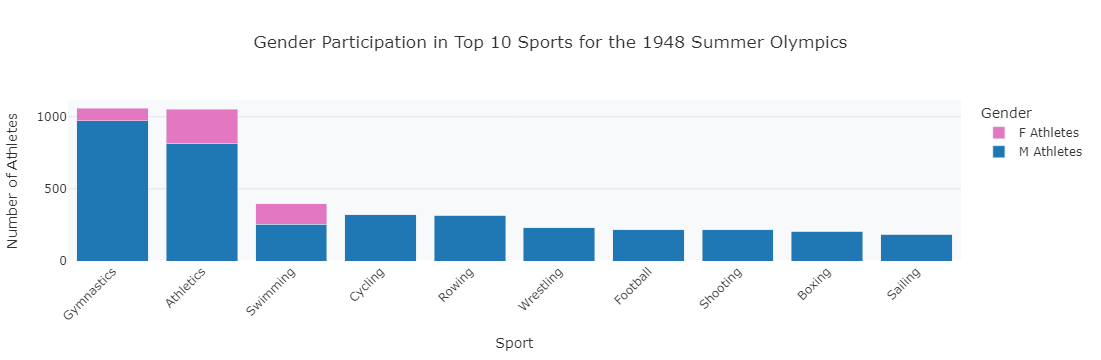

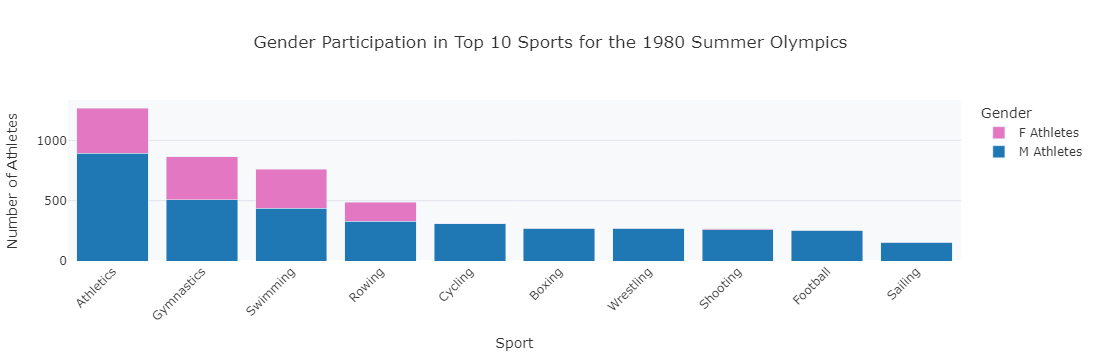

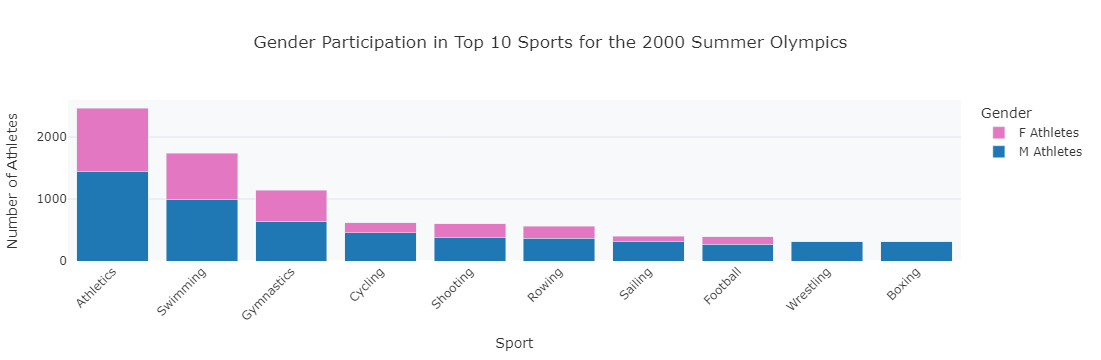

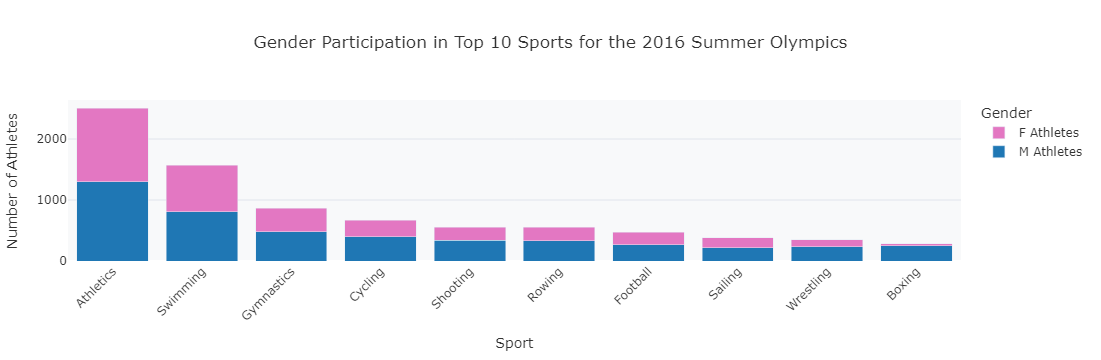

In [81]:
selected_years = [1948, 1980, 2000, 2016]

colors = {
    'M': '#1f77b4',  # Muted blue for males
    'F': '#e377c2'   # Soft pink for females
}

# Iterate through each selected year
for year in selected_years:
    # Filter data for the selected year
    year_data = top_sports_data[top_sports_data['Year'] == year]
    
    # Group by sport and gender, then count athletes
    athlete_counts = year_data.groupby(['Sport', 'Sex']).size().reset_index(name='Athlete Count')
    
    # Pivot for easier plotting
    pivot_df = athlete_counts.pivot_table(index='Sport', columns='Sex', values='Athlete Count', fill_value=0)
    
    # Add a total column to sort the sports by total participants
    pivot_df['Total'] = pivot_df.sum(axis=1)
    pivot_df_sorted = pivot_df.sort_values('Total', ascending=False)
    
    # Create a plot with sorted sports by total participants
    fig = go.Figure()
    for gender in ['M', 'F']:
        fig.add_trace(go.Bar(
            x=pivot_df_sorted.index,  # Sport names, sorted by total participation
            y=pivot_df_sorted[gender],
            name=f'{gender} Athletes',
            marker_color=colors[gender]
        ))
    
    # Update layout for stacked bars
    fig.update_layout(
        title={
            'text': f'Gender Participation in Top 10 Sports for the {year} Summer Olympics',
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        xaxis_title='Sport',
        xaxis_tickangle=-45,
        yaxis=dict(
            title='Number of Athletes',
            showgrid=True,
            gridcolor='#e1e5ed'
        ),
        barmode='stack',
        legend_title='Gender',
        plot_bgcolor='#f8f9fa',  # Very light grey background
        font=dict(size=12, color='#333'),  # Dark grey text for better readability
        paper_bgcolor='rgba(0,0,0,0)'  # Transparent paper background
    )
    
    # Optional: adjust margin to ensure the title and legend are not cut off
    fig.update_layout(margin=dict(l=30, r=30, t=100, b=30))
    
    fig.show()

### Key Findings 

**1. Growth in Female Participation:**
The data shows a steady increase in female participation in top sports from 1948 to 2016. Women are almost equal to men in sports like athletics and gymnastics by 2016. Only 3 sports had women athletes in top 10 Sports in 1948.

**2. Diverse Interests:**
Athletics and gymnastics have consistently been at the forefront of female participation. These sports not only attracted a significant number of female athletes but also saw a progressive increase in female competitors over the years. By 2016, these sports were nearing gender parity, showing broader societal shifts towards gender equality.

**3. Contact Sports Disparity:**
Sports such as boxing and wrestling continue to have fewer female athletes, pointing to ongoing gaps in some areas. Even in 2000's combat sports did not get many female athletes.

**4. Impact of Policies and Culture:**
The changes shows evolving policies and cultural support for gender equality, influencing increased female participation rates.


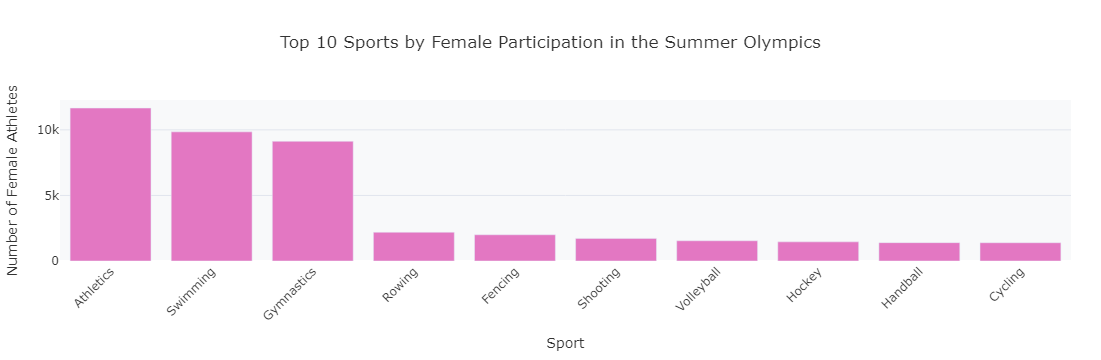

In [82]:
female_summer_data = merged_data[(merged_data['Season'] == 'Summer') & (merged_data['Sex'] == 'F')]

# Group by sport and count female athletes
female_athletes_by_sport = female_summer_data.groupby('Sport').size().reset_index(name='Female Athlete Count')

# Sort the sports by the count of female participants and select the top 10
top_female_sports = female_athletes_by_sport.sort_values('Female Athlete Count', ascending=False).head(10)

# Create a bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_female_sports['Sport'],
    y=top_female_sports['Female Athlete Count'],
    name='Female Athletes',
    marker_color='#e377c2'  # Soft pink for females
))

# Update layout for clarity and better presentation
fig.update_layout(
    title={
        'text': 'Top 10 Sports by Female Participation in the Summer Olympics',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Sport',
    xaxis_tickangle=-45,  # Rotate labels for better visibility
    yaxis=dict(
        title='Number of Female Athletes',
        showgrid=True,
        gridcolor='#e1e5ed'
    ),
    legend_title='Gender',
    plot_bgcolor='#f8f9fa',  # Very light grey background
    font=dict(size=12, color='#333'),  # Dark grey text for better readability
    paper_bgcolor='rgba(0,0,0,0)'  # Transparent paper background
)

# Optional: adjust margin to ensure the title and legend are not cut off
fig.update_layout(margin=dict(l=30, r=30, t=100, b=30))

fig.show()


This bar chart shows the number of female athletes in the top 10 sports at the Summer Olympics. It highlights sports where women are most active and helps us see where female participation is highest.

- **Athletics and Swimming** lead with the highest number of female participants, showing that these sports are very popular among women.
- **Gymnastics** also shows strong female involvement, indicating its appeal and accessibility to women.
- Other sports like **Rowing, Fencing, and Volleyball** show  female participation, but not as high as the leading sports.
- **Handball** and **Cycling** appear at the lower end, yet they still make it to the top 10, showing that there are opportunities for women in a wide range of sports.

This visualization is crucial for understanding where female athletes have made the most impact and where sports organizations might focus their efforts to improve gender equality in sports.

### 3-) Comparative Analysis of Medal Wins:


This table examines the number of gold medals won by female athletes in top sports. Despite often having fewer total participants, women in certain sports are achieving success comparable to their male counterparts, showcasing significant strides towards gender parity in these disciplines.

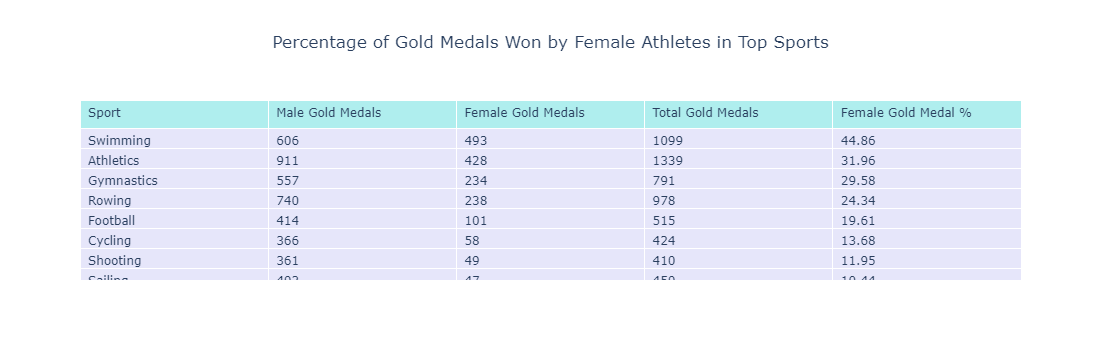

In [83]:
# Filter for gold medals and consider only top sports
gold_medals = merged_data[(merged_data['Medal'] == 'Gold') & (merged_data['Sport'].isin(top_sports))]

# Group by sport and gender, and count the number of gold medals
gold_medals_by_sport_sex = gold_medals.groupby(['Sport', 'Sex']).size().unstack(fill_value=0)

# Calculate the total number of gold medals per sport
gold_medals_by_sport_sex['Total Gold'] = gold_medals_by_sport_sex.sum(axis=1)

# Calculate the percentage of gold medals won by females and round it
gold_medals_by_sport_sex['Female Gold Medal %'] = (gold_medals_by_sport_sex['F'] / gold_medals_by_sport_sex['Total Gold'] * 100).round(2)

# Sort the table by the percentage of gold medals won by females
gold_medals_by_sport_sex = gold_medals_by_sport_sex.sort_values('Female Gold Medal %', ascending=False)

# Create a table visualization using Plotly
fig = go.Figure(data=[
    go.Table(
        header=dict(values=['Sport', 'Male Gold Medals', 'Female Gold Medals', 'Total Gold Medals', 'Female Gold Medal %'],
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[
            gold_medals_by_sport_sex.index,  # Sports
            gold_medals_by_sport_sex['M'],  # Male gold medals
            gold_medals_by_sport_sex['F'],  # Female gold medals
            gold_medals_by_sport_sex['Total Gold'],  # Total gold medals
            gold_medals_by_sport_sex['Female Gold Medal %']  # Rounded percentage of female gold medals
        ],
        fill_color='lavender',
        align='left'))
])

# Update layout with the centered title
fig.update_layout(
    title={
        'text': 'Percentage of Gold Medals Won by Female Athletes in Top Sports',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()

## Key Findings 

- Female athletes have won a significant share of gold medals in swimming, nearly 45% of the total, which is quite high considering the historical context of gender participation in sports.

- Athletics and Gymnastics also show substantial female achievement, with around 31.96% and 29.58% of gold medals respectively. This suggests that these areas have been more accessible or supportive for female athletes over the years.

### 4-) Global View of Female Athletic Success
The geographical distribution of medals won by female athletes is portrayed through a detailed  map, which colors countries based on the number of medals won by women. An animated version of this map takes the viewer through a time-lapse from 1900 to 2016, offering a dynamic view of how women’s success at the Olympics.

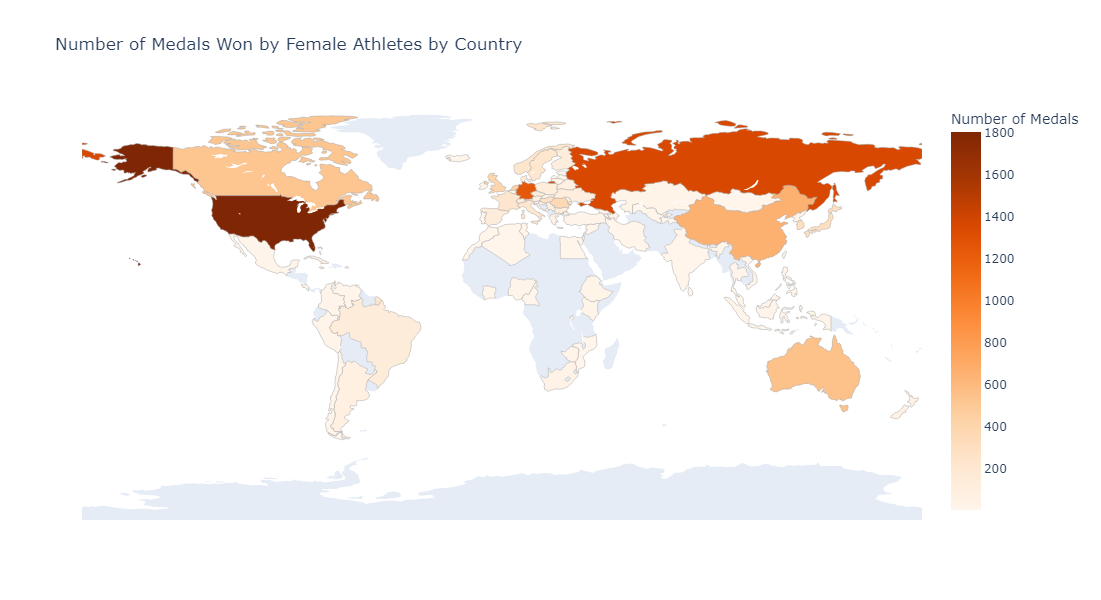

In [84]:
# Filter for female medals
female_medals = merged_data[(merged_data['Sex'] == 'F') & (merged_data['Medal'].notna())]


medals_by_noc_medal = female_medals.groupby(['region', 'Medal']).size().unstack(fill_value=0)

medals_by_noc_medal['Total'] = medals_by_noc_medal[['Gold', 'Silver', 'Bronze']].sum(axis=1)

medals_by_noc_medal = medals_by_noc_medal.reset_index()

# Create a choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=medals_by_noc_medal['region'],  # Spatial coordinates
    locationmode='country names',  # Set of locations match entries in `locations`
    z=medals_by_noc_medal['Total'],  # Data to be color-coded
    text=medals_by_noc_medal['region'],  # Hover text
    colorscale='Oranges',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='Number of Medals',
    hovertemplate=(
        "<b>%{text}</b><br>" +
        "Total Medals: %{z}<br>" +
        "Gold: %{customdata[0]}<br>" +
        "Silver: %{customdata[1]}<br>" +
        "Bronze: %{customdata[2]}<extra></extra>"
    ),
    customdata=medals_by_noc_medal[['Gold', 'Silver', 'Bronze']]
))

# Update layout to make the map larger and more visually appealing
fig.update_layout(
    title_text='Number of Medals Won by Female Athletes by Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    width=1000,  # Set the width to 1000 pixels
    height=600   # Set the height to 600 pixels
)

fig.show()


1. **Dominance of Certain Countries**: Countries like United States and Russia and Germany have a high number of medals won by female athletes. These countries have historically invested in women's sports, providing facilities, funding, and support.

2. **Geographical Spread**: The variation in color intensity across different continents reflects the unequal distribution of Olympic success among female athletes globally. Western countries, particularly in North America and Europe, show higher medal counts, which could correlate with better sports infrastructure and more supportive policies towards women in sports.

3. **Cultural and Socio-Economic Factors**: The maps also shows hint at the influence of cultural and socio-economic factors on sports. Countries with fewer medals may lack the necessary infrastructure or cultural support for women in sports such as Turkey and Mexico.


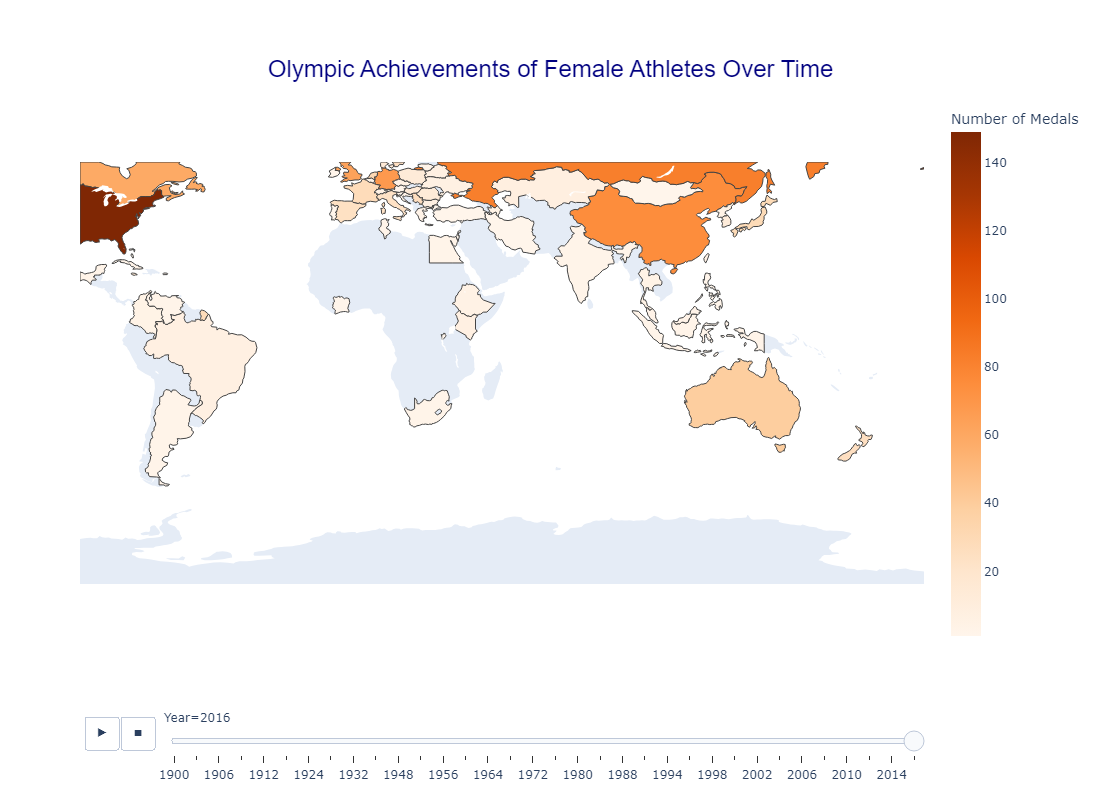

In [85]:
female_medals = merged_data[(merged_data['Sex'] == 'F') & (merged_data['Medal'].notna())]


# Group by year, region (country names), and count medals
medals_by_country_year = female_medals.groupby(['Year', 'region', 'Medal']).size().unstack(fill_value=0).reset_index()

# Calculate total medals per year and country
medals_by_country_year['Total'] = medals_by_country_year[['Gold', 'Silver', 'Bronze']].sum(axis=1)


medals_by_country_year = medals_by_country_year.dropna(subset=['region'])

fig = px.choropleth(
    medals_by_country_year,
    locations='region',  # Using 'region' which contains country names
    locationmode='country names',
    color='Total',
    hover_name='region',  # Updated to use 'region' for hover
    hover_data=['Gold', 'Silver', 'Bronze', 'Total'],
    animation_frame='Year',
    color_continuous_scale='Oranges',
    title='Olympic Achievements of Female Athletes Over Time',  # Updated title
    height=800,  # Increases the height of the figure
    width=1100   # Increases the width of the figure
)

# Improve layout and aesthetics
fig.update_layout(
    title=dict(
        text='Olympic Achievements of Female Athletes Over Time',
        x=0.5,  # Center title
        xanchor='center',
        y=0.95,  # Adjust vertical position
        font=dict(
            family="Arial, sans-serif",  # Specify font family
            size=24,  # Increase font size
            color="navy"  # Change font color
        ),
        pad=dict(t=20, r=20, b=20, l=20)  # Add padding around the title (top, right, bottom, left)
    ),
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    coloraxis_colorbar=dict(
        title='Number of Medals'
    )
)

fig.show()

- This interactive map shows the success of female athletes at the Olympics each year. Over the years, while the success rate varies by country, regions with consistently high achievements suggest strong support and encouragement for women in sports.

### 5-)Participation of Female Athletes from Diverse Cultures Over Time

This visualization shows the evolution of female athlete participation from three culturally distinct countries: Turkey, Mexico, and Denmark. These nations have been chosen to represent a range of geographic, cultural contexts that influence how women participate in the global arena of the Summer Olympics.

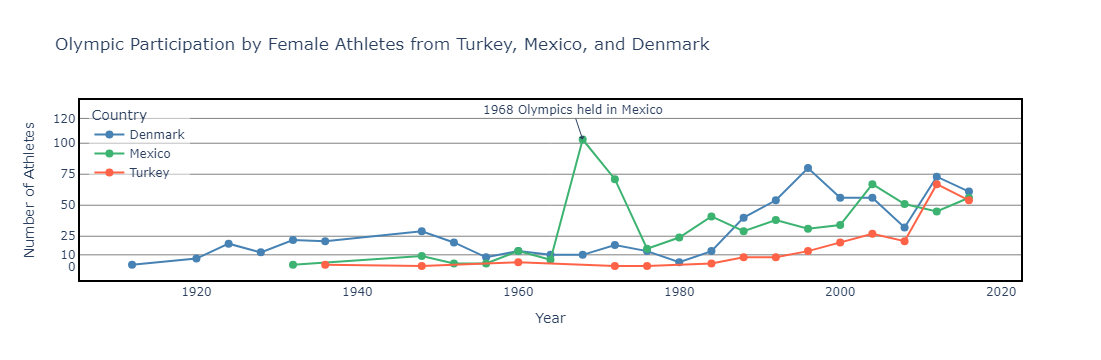

In [86]:
countries = ['TUR', 'MEX', 'DEN']  # NOC codes for Turkey, Mexico, and France
female_athletes = merged_data[(merged_data['Sex'] == 'F') & (merged_data['Season'] == 'Summer') & (merged_data['NOC'].isin(countries))]

# Group by Year and Country, then count the number of athletes
grouped_data = female_athletes.groupby(['Year', 'NOC']).size().reset_index(name='Count')

# Map NOC to country names for better readability
noc_to_country = {'TUR': 'Turkey', 'MEX': 'Mexico', 'DEN': 'Denmark'}
grouped_data['Country'] = grouped_data['NOC'].map(noc_to_country)

# Create the line plot
fig = go.Figure()

# Define colors for better distinction
colors = {
    'Turkey': 'rgb(255,99,71)',  # Tomato
    'Mexico': 'rgb(60,179,113)',  # Medium Sea Green
    'Denmark': 'rgb(70,130,180)'  # Steel Blue
}

# Add traces
for country in grouped_data['Country'].unique():
    country_data = grouped_data[grouped_data['Country'] == country]
    fig.add_trace(go.Scatter(
        x=country_data['Year'],
        y=country_data['Count'],
        mode='lines+markers',
        name=country,
        line=dict(color=colors[country], width=2),
        marker=dict(size=8)
    ))

fig.add_annotation(
    x=1968,
    y=grouped_data[(grouped_data['Year'] == 1968) & (grouped_data['Country'] == 'Mexico')]['Count'].values[0],
    text="1968 Olympics held in Mexico",
    showarrow=True,
    arrowhead=1,
)

# Update layout to mimic the provided chart style
fig.update_layout(
    title='Olympic Participation by Female Athletes from Turkey, Mexico, and Denmark',
    xaxis=dict(
        title='Year',
        showgrid=False,
        showline=True,
        linewidth=2,
        linecolor='black',
        mirror=True
    ),
    yaxis=dict(
        title='Number of Athletes',
        showgrid=True,
        gridcolor='grey',
        showline=True,
        linewidth=2,
        linecolor='black',
        mirror=True,
        tickvals=[0, 10, 25, 50, 75, 100, 120]  # Adding specific tick values
    ),
    plot_bgcolor='white',
    legend=dict(
        title='Country',
        x=0.01,
        y=0.99,
        bgcolor='rgba(255,255,255,0.5)'
    ),
    hovermode='x'
)

# Show figure
fig.show()

### Key Observations

- Denmark has shown an earlier and consistently higher level of female participation in the Olympics compared to Turkey and Mexico. This could be attributed to Denmark's progressive policies on gender equality.
  
-  The significant spike in female participation in 1968 correlates with Mexico hosting the Olympic Games that year. This event likely boosted national interest and support for athletics, temporarily increasing female athlete numbers.

-  Despite having fewer female athletes than Denmark and Mexico until the 2000s, Turkey's numbers have risen sharply, reaching near parity with the other two countries by 2016. 

-  While each country has distinct cultural backgrounds, the trends suggest a convergence towards increasing female participation in sports. This change reflects a global movement towards gender equality in athletics.


## 6-) Conclusion

In this project I explored the evolution of female participation and success in the Olympic Games, highlighting notable advancements and persistent challenges in achieving gender equality in sports. 

1. **Increasing Female Participation**: The data consistently showed a significant increase in female participation across Summer and Winter Olympics. This rise is most  after 1980, aligning with global movements for gender equality.

2. **Impact of Cultural and Social Contexts**: Analyses of participation trends in countries like Turkey, Mexico, and Denmark illuminated how different cultural, social, and political environments shape women's Olympic involvement. Notably, Denmark's culture of gender-inclusive policies resulted in higher female participation rates compared to Turkey and Mexico.

3. **Sport-Specific Trends and Achievements**: The project highlighted sports with increasing female representation, particularly athletics and gymnastics, where women have achieved near parity with men. However, differences persist in contact sports.

4. **Geographic Disparities in Success**: The visualization of medal distribution by country underscored the dominance of certain regions, particularly North America and Europe, which can be attributed to better resources and support for women in sports.

### Limitations
The project encounters several limitations:
  
- **Accuracy of Early Records**: The accuracy of early Olympic records is uncertain due to potential limitations in the data collection methods of those times. This may affect the reliability of trends observed in the earlier years of the Olympic Games.

- **Cultural Analysis Depth**: The analysis briefly explores the impact of cultural factors on female participation in the Olympics but does not delve deeply into how specific cultural elements in various countries might influence these trends.

- **Economic Data**: The project lacks economic data, which could have been used to analyze how the economic conditions in different countries affect female participation in sports. Economic strength or constraints can significantly influence sports development.